# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [2]:
from sklearn import datasets

data = datasets.load_wine()

In [3]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [5]:
X.isnull().sum()
# Just to check :)

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [32]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [33]:
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

In [34]:
k_means = KMeans(n_clusters=8, 
                 random_state=0)

k_means.fit(X)

KMeans(random_state=0)

In [35]:
metrics.silhouette_score(X, k_means.labels_, metric='euclidean')

0.5486213604076143

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [36]:
k_means = KMeans(n_clusters=5, 
                 random_state=42)

k_means.fit(X)

KMeans(n_clusters=5, random_state=42)

In [37]:
metrics.silhouette_score(X, k_means.labels_, metric='euclidean')

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [38]:
k_means = KMeans(n_clusters=3, 
                 random_state=123)

k_means.fit(X)

KMeans(n_clusters=3, random_state=123)

In [39]:
metrics.silhouette_score(X, k_means.labels_, metric='euclidean')

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

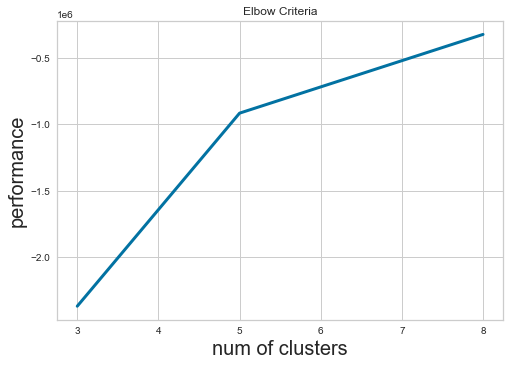

In [48]:
Ks = [3, 5, 8]
km = [KMeans(n_clusters=i, random_state=1) for i in Ks]
score = [km[i].fit(X).score(X) for i in range(len(km))]

plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('performance', size=20)
plt.plot(Ks, score, lw=3)
plt.show()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [43]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

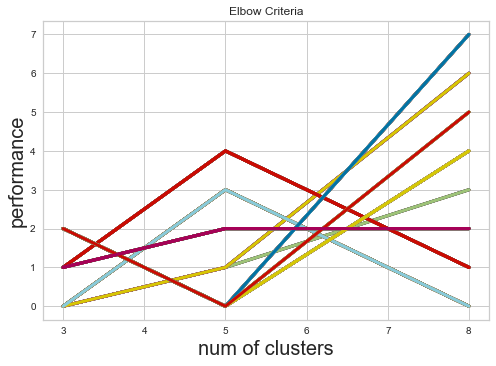

In [55]:
Ks = [3, 5, 8]
km = [AgglomerativeClustering(n_clusters=i) for i in Ks]
score = [km[i].fit(X).score(X) for i in range(len(km))]

plt.title('Elbow Criteria')
plt.xlabel('num of clusters', size=20)
plt.ylabel('performance', size=20)
plt.plot(Ks, score, lw=3)
plt.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [62]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(2))
pca_pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


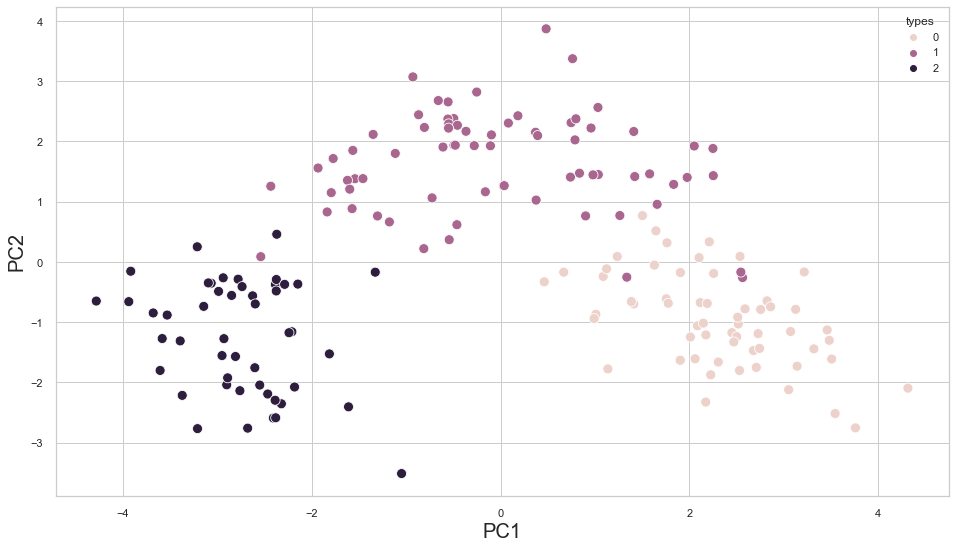

In [68]:
transformed_X = pca_pipeline.transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['types'] = y

sns.scatterplot('PC1', 'PC2', data=data, hue='types', s=100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [69]:
from sklearn.manifold import TSNE

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


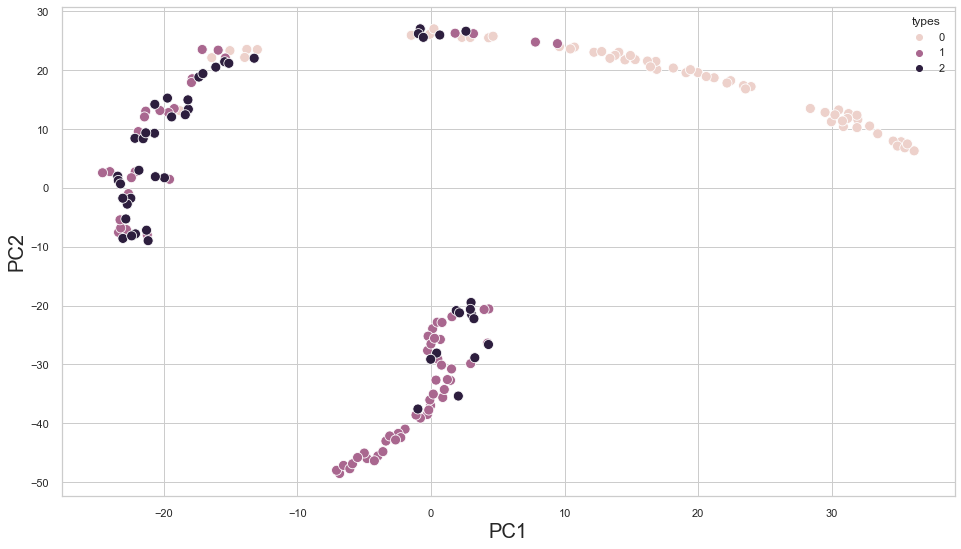

In [76]:
tsne = TSNE(n_components=2, perplexity=10)
transformed_X = tsne.fit_transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['types'] = y

sns.scatterplot('PC1', 'PC2', data=data, hue='types', s=100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


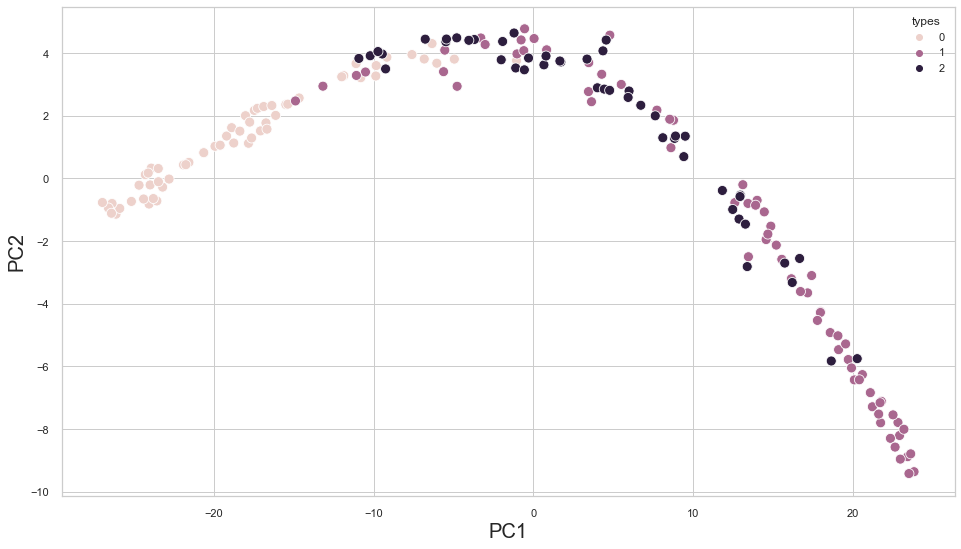

In [72]:
tsne = TSNE(n_components=2, perplexity=20)
transformed_X = tsne.fit_transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['types'] = y

sns.scatterplot('PC1', 'PC2', data=data, hue='types', s=100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


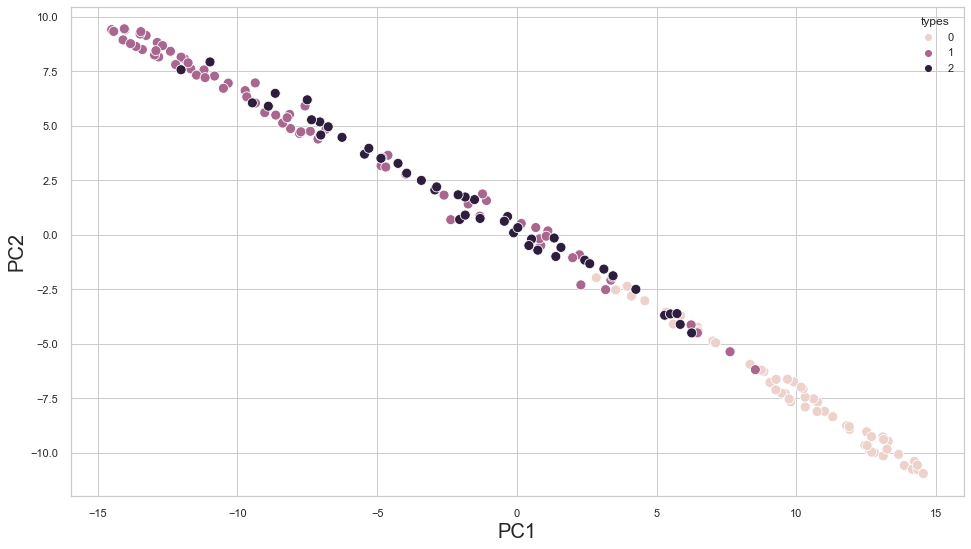

In [73]:
tsne = TSNE(n_components=2, perplexity=30)
transformed_X = tsne.fit_transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['types'] = y

sns.scatterplot('PC1', 'PC2', data=data, hue='types', s=100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


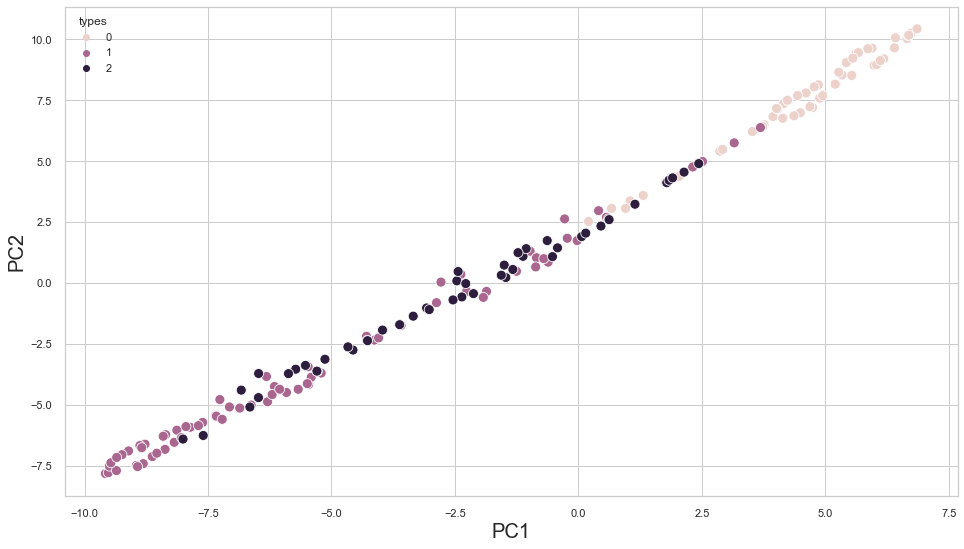

In [77]:
tsne = TSNE(n_components=2, perplexity=40)
transformed_X = tsne.fit_transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['types'] = y

sns.scatterplot('PC1', 'PC2', data=data, hue='types', s=100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
plt.show()